<a href="https://colab.research.google.com/github/SandraYana/CRISP-DM/blob/main/CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from google.colab import files
uploaded = files.upload()


Saving student-mat.csv to student-mat (4).csv


In [63]:
import pandas as pd

df = pd.read_csv("student-mat.csv", sep=";")
pd.set_option('display.max_columns', None)
print("Dimensiones:", df.shape)

df.head(15)

Dimensiones: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


#Preprocesamiento de datos

1. SELECCIONAR DATOS

In [64]:
# Lista ampliada de columnas relevantes
columnas_relevantes = [
    # Información académica
    'school', 'age', 'studytime', 'failures', 'absences',
    'Medu', 'Fedu', 'G1', 'G2', 'G3',

    # Información familiar y social
    'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
    'famrel', 'freetime', 'goout', 'Dalc', 'Walc',

    # Factores de apoyo educativo
    'schoolsup', 'famsup', 'paid', 'internet', 'higher', 'activities', 'nursery'
]

# Filtrar dataset solo con las columnas relevantes
df = df[columnas_relevantes]

print("\nColumnas seleccionadas:", len(columnas_relevantes))
display(df.head(10))


Columnas seleccionadas: 28


,school,age,studytime,failures,absences,Medu,Fedu,G1,G2,G3,famsize,Pstatus,Mjob,Fjob,reason,guardian,famrel,freetime,goout,Dalc,Walc,schoolsup,famsup,paid,internet,higher,activities,nursery
0,GP,18,2,0,6,4,4,5,6,6,GT3,A,at_home,teacher,course,mother,4,3,4,1,1,yes,no,no,no,yes,no,yes
1,GP,17,2,0,4,1,1,5,5,6,GT3,T,at_home,other,course,father,5,3,3,1,1,no,yes,no,yes,yes,no,no
2,GP,15,2,3,10,1,1,7,8,10,LE3,T,at_home,other,other,mother,4,3,2,2,3,yes,no,yes,yes,yes,no,yes
3,GP,15,3,0,2,4,2,15,14,15,GT3,T,health,services,home,mother,3,2,2,1,1,no,yes,yes,yes,yes,yes,yes
4,GP,16,2,0,4,3,3,6,10,10,GT3,T,other,other,home,father,4,3,2,1,2,no,yes,yes,no,yes,no,yes
5,GP,16,2,0,10,4,3,15,15,15,LE3,T,services,other,reputation,mother,5,4,2,1,2,no,yes,yes,yes,yes,yes,yes
6,GP,16,2,0,0,2,2,12,12,11,LE3,T,other,other,home,mother,4,4,4,1,1,no,no,no,yes,yes,no,yes
7,GP,17,2,0,6,4,4,6,5,6,GT3,A,other,teacher,home,mother,4,1,4,1,1,yes,yes,no,no,yes,no,yes
8,GP,15,2,0,0,3,2,16,18,19,LE3,A,services,other,home,mother,4,2,2,1,1,no,yes,yes,yes,yes,no,yes
9,GP,15,2,0,0,3,4,14,15,15,GT3,T,other,other,home,mother,5,5,1,1,1,no,yes,yes,yes,yes,yes,yes


2. LIMPIAR DATOS


Valores nulos por columna:
school        0
age           0
studytime     0
failures      0
absences      0
Medu          0
Fedu          0
G1            0
G2            0
G3            0
famsize       0
Pstatus       0
Mjob          0
Fjob          0
reason        0
guardian      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
schoolsup     0
famsup        0
paid          0
internet      0
higher        0
activities    0
nursery       0
dtype: int64


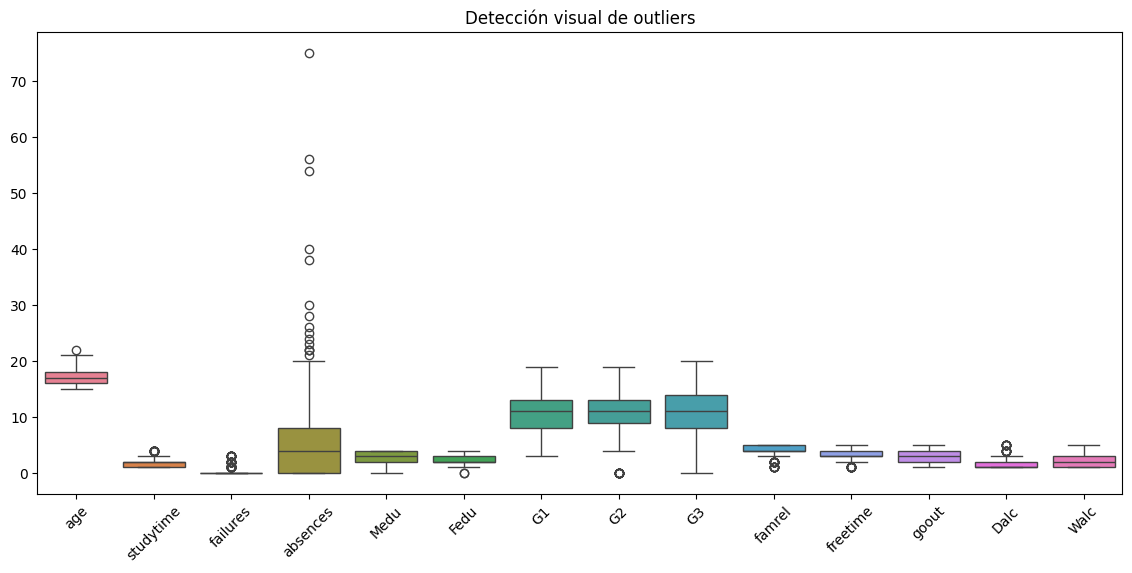


Datos después de limpiar outliers:


,age,studytime,failures,absences,Medu,Fedu,G1,G2,G3,famrel,freetime,goout,Dalc,Walc
count,233.000000,233.000000,233.0,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.00000,233.000000
mean,16.484979,1.961373,0.0,4.038627,2.854077,2.686695,11.596567,11.703863,11.733906,4.115880,3.300429,2.978541,1.27897,2.103004
std,1.114554,0.690616,0.0,4.422051,1.092763,1.058888,3.110104,3.104895,3.546187,0.694409,0.848350,1.027410,0.56043,1.128640
min,15.000000,1.000000,0.0,0.000000,0.000000,1.000000,5.000000,5.000000,0.000000,3.000000,2.000000,1.000000,1.00000,1.000000
25%,16.000000,1.000000,0.0,0.000000,2.000000,2.000000,9.000000,9.000000,10.000000,4.000000,3.000000,2.000000,1.00000,1.000000
50%,16.000000,2.000000,0.0,2.000000,3.000000,3.000000,11.000000,11.000000,11.000000,4.000000,3.000000,3.000000,1.00000,2.000000
75%,17.000000,2.000000,0.0,6.000000,4.000000,4.000000,14.000000,14.000000,14.000000,5.000000,4.000000,4.000000,1.00000,3.000000
max,20.000000,3.000000,0.0,20.000000,4.000000,4.000000,19.000000,19.000000,19.000000,5.000000,5.000000,5.000000,3.00000,5.000000


In [65]:
# 2.1 Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# 2.2 Rellenar valores nulos con la mediana para numéricos
df.fillna(df.median(numeric_only=True), inplace=True)

# 2.3 Visualizar posibles outliers en columnas numéricas
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Detección visual de outliers")
plt.xticks(rotation=45)
plt.show()

# 2.4 Eliminar outliers con el método IQR
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

df = df[~((df.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) |
          (df.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nDatos después de limpiar outliers:")
display(df.describe())

3. CONSTRUIR DATOS

In [66]:
# 3.1 Crear columna con promedio de notas
df['Promedio_Notas'] = df[['G1', 'G2', 'G3']].mean(axis=1)

# 3.2 Crear variable binaria: 1 = Aprobado, 0 = Desaprobado
df['Aprobado'] = np.where(df['Promedio_Notas'] >= 10, 1, 0)

# 3.3 Crear variable 'Faltas_Altas' (si ausencias > 10)
df['Faltas_Altas'] = np.where(df['absences'] > 10, 1, 0)

# 3.4 Clasificar edad en grupos (categoría)
df['Grupo_Edad'] = pd.cut(df['age'], bins=[14, 16, 18, 22], labels=['Adolescente', 'Joven', 'Adulto'])

print("\nNuevas columnas creadas:")
display(df[['Promedio_Notas', 'Aprobado', 'Faltas_Altas', 'Grupo_Edad']].head())


Nuevas columnas creadas:


,Promedio_Notas,Aprobado,Faltas_Altas,Grupo_Edad
0,5.666667,0,0,Joven
1,5.333333,0,0,Joven
3,14.666667,1,0,Adolescente
4,8.666667,0,0,Adolescente
5,15.000000,1,0,Adolescente


4. INTEGRAR DATOS

In [67]:
# Simular datos externos: nivel de apoyo emocional de la familia
extra_data = pd.DataFrame({
    'ID': range(1, len(df) + 1),
    'Apoyo_Familiar': np.random.choice(['Alto', 'Medio', 'Bajo'], size=len(df))
})

# Añadir columna ID al dataset original
df['ID'] = range(1, len(df) + 1)

# Integrar datasets por ID
df_integrado = pd.merge(df, extra_data, on='ID', how='left')

print("\nDatos después de integrar información externa:")
display(df_integrado.head())


Datos después de integrar información externa:


,school,age,studytime,failures,absences,Medu,Fedu,G1,G2,G3,famsize,Pstatus,Mjob,Fjob,reason,guardian,famrel,freetime,goout,Dalc,Walc,schoolsup,famsup,paid,internet,higher,activities,nursery,Promedio_Notas,Aprobado,Faltas_Altas,Grupo_Edad,ID,Apoyo_Familiar
0,GP,18,2,0,6,4,4,5,6,6,GT3,A,at_home,teacher,course,mother,4,3,4,1,1,yes,no,no,no,yes,no,yes,5.666667,0,0,Joven,1,Bajo
1,GP,17,2,0,4,1,1,5,5,6,GT3,T,at_home,other,course,father,5,3,3,1,1,no,yes,no,yes,yes,no,no,5.333333,0,0,Joven,2,Medio
2,GP,15,3,0,2,4,2,15,14,15,GT3,T,health,services,home,mother,3,2,2,1,1,no,yes,yes,yes,yes,yes,yes,14.666667,1,0,Adolescente,3,Alto
3,GP,16,2,0,4,3,3,6,10,10,GT3,T,other,other,home,father,4,3,2,1,2,no,yes,yes,no,yes,no,yes,8.666667,0,0,Adolescente,4,Alto
4,GP,16,2,0,10,4,3,15,15,15,LE3,T,services,other,reputation,mother,5,4,2,1,2,no,yes,yes,yes,yes,yes,yes,15.000000,1,0,Adolescente,5,Bajo


5. FORMATEAR DATOS

In [68]:
# 5.1 Convertir variables categóricas de texto a numéricas
cols_categoricas = ['school', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                    'reason', 'guardian', 'schoolsup', 'famsup',
                    'paid', 'internet', 'higher', 'activities', 'nursery',
                    'Grupo_Edad', 'Apoyo_Familiar']

for col in cols_categoricas:
    df_integrado[col] = df_integrado[col].astype('category').cat.codes

# 5.2 Asegurar tipos correctos
df_integrado = df_integrado.astype({
    'Aprobado': 'int',
    'Faltas_Altas': 'int'
})

print("\nDatos formateados y listos para modelado:")
display(df_integrado.head())


Datos formateados y listos para modelado:


,school,age,studytime,failures,absences,Medu,Fedu,G1,G2,G3,famsize,Pstatus,Mjob,Fjob,reason,guardian,famrel,freetime,goout,Dalc,Walc,schoolsup,famsup,paid,internet,higher,activities,nursery,Promedio_Notas,Aprobado,Faltas_Altas,Grupo_Edad,ID,Apoyo_Familiar
0,0,18,2,0,6,4,4,5,6,6,0,0,0,4,0,1,4,3,4,1,1,1,0,0,0,1,0,1,5.666667,0,0,1,1,1
1,0,17,2,0,4,1,1,5,5,6,0,1,0,2,0,0,5,3,3,1,1,0,1,0,1,1,0,0,5.333333,0,0,1,2,2
2,0,15,3,0,2,4,2,15,14,15,0,1,1,3,1,1,3,2,2,1,1,0,1,1,1,1,1,1,14.666667,1,0,0,3,0
3,0,16,2,0,4,3,3,6,10,10,0,1,2,2,1,0,4,3,2,1,2,0,1,1,0,1,0,1,8.666667,0,0,0,4,0
4,0,16,2,0,10,4,3,15,15,15,1,1,3,2,3,1,5,4,2,1,2,0,1,1,1,1,1,1,15.000000,1,0,0,5,1


# MODELADO




In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

1. DIVISIÓN DE LOS DATOS

In [70]:
df_final = df_integrado.copy()

X = df_final.drop(columns=['Aprobado'])
y = df_final['Aprobado']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Tamaño conjunto de entrenamiento:", X_train.shape)
print("Tamaño conjunto de prueba:", X_test.shape)

Tamaño conjunto de entrenamiento: (186, 33)
Tamaño conjunto de prueba: (47, 33)


2. CREACIÓN Y ENTRENAMIENTO DE MODELOS

In [71]:
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True)
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    resultados[nombre] = {
        "modelo": modelo,
        "y_pred": y_pred,
        "accuracy": acc,
        "matriz_confusion": confusion_matrix(y_test, y_pred)
    }

3. EVALUACIÓN VISUAL

In [72]:
resultados_acc = pd.DataFrame({
    "Modelo": [nombre for nombre in resultados.keys()],
    "Accuracy": [resultados[nombre]["accuracy"] for nombre in resultados.keys()]
}).sort_values(by="Accuracy", ascending=False)

print("\nRendimiento de los Modelos:\n")
display(resultados_acc)



Rendimiento de los Modelos:



,Modelo,Accuracy
1,Árbol de Decisión,1.000000
2,Random Forest,1.000000
0,Regresión Logística,0.957447
3,SVM,0.680851


4. MATRIZ DE CONFUSIÓN

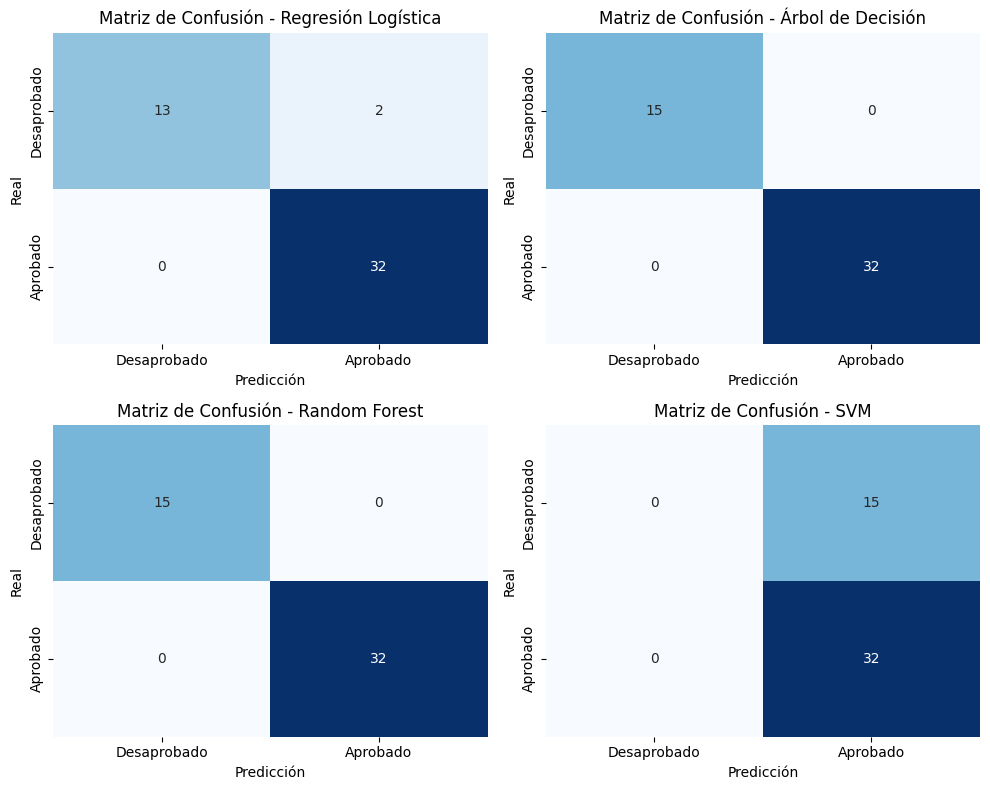

In [73]:
def plot_matriz_confusion_grid(y_true, resultados):
    modelos = list(resultados.keys())
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten()

    for idx, (nombre, datos) in enumerate(resultados.items()):
        cm = confusion_matrix(y_true, datos["y_pred"])
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Desaprobado", "Aprobado"], yticklabels=["Desaprobado", "Aprobado"],ax=axes[idx]
        )
        axes[idx].set_title(f"Matriz de Confusión - {nombre}")
        axes[idx].set_xlabel("Predicción")
        axes[idx].set_ylabel("Real")

    for j in range(len(resultados), 4):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_matriz_confusion_grid(y_test, resultados)


5. REPORTE DE CLASIFICACIÓN

In [76]:
def reporte_visual(y_true, y_pred, nombre_modelo):
    reporte = classification_report(y_true, y_pred, output_dict=True)
    df_reporte = pd.DataFrame(reporte).transpose()

    df_reporte = df_reporte.loc[['0', '1', 'accuracy', 'macro avg', 'weighted avg']]

    print(f"\nReporte de {nombre_modelo}")

    display(df_reporte)


for nombre, datos in resultados.items():
    reporte_visual(y_test, datos["y_pred"], nombre)



Reporte de Regresión Logística


,precision,recall,f1-score,support
0,1.000000,0.866667,0.928571,15.000000
1,0.941176,1.000000,0.969697,32.000000
accuracy,0.957447,0.957447,0.957447,0.957447
macro avg,0.970588,0.933333,0.949134,47.000000
weighted avg,0.959950,0.957447,0.956572,47.000000



Reporte de Árbol de Decisión


,precision,recall,f1-score,support
0,1.0,1.0,1.0,15.0
1,1.0,1.0,1.0,32.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,47.0
weighted avg,1.0,1.0,1.0,47.0



Reporte de Random Forest


,precision,recall,f1-score,support
0,1.0,1.0,1.0,15.0
1,1.0,1.0,1.0,32.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,47.0
weighted avg,1.0,1.0,1.0,47.0



Reporte de SVM


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,15.000000
1,0.680851,1.000000,0.810127,32.000000
accuracy,0.680851,0.680851,0.680851,0.680851
macro avg,0.340426,0.500000,0.405063,47.000000
weighted avg,0.463558,0.680851,0.551576,47.000000


6. SELECCIÓN DEL MEJOR MODELO

In [77]:
mejor_modelo = max(resultados.items(), key=lambda x: x[1]["accuracy"])
print(f"\nEl mejor modelo es: {mejor_modelo[0]} con un Accuracy de {mejor_modelo[1]['accuracy']:.2f}")


El mejor modelo es: Árbol de Decisión con un Accuracy de 1.00
